# Initialization

In [0]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
from time import sleep
from random import randrange

In [0]:
url = 'https://nplus1.ru/'
url = 'https://nplus1.ru/news/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')
# print(soup.prettify())

In [0]:
url = 'https://postnauka.ru/?page=4'
page = requests.get(url)
soup_p = BeautifulSoup(page.text, 'lxml')
# print(soup_p.prettify())

In [42]:
# Подключаем google disk
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
!ls '/content/drive/My Drive/data/df_Nplus1.xlsx'

'/content/drive/My Drive/data/df_Nplus1.xlsx'


# Getting (downloading) data

In [0]:
def get_links_from_soup(soup):
    urls = []
    for link in soup.find_all('a'):
        if '/news/' in link.get('href'):
            urls.append(link.get('href'))
            
    full_urls = []
    for u in urls:
        res = 'https://nplus1.ru' + u
        full_urls.append(res) 

    return(full_urls)

full_urls = get_links_from_soup(soup)
full_urls

['https://nplus1.ru/news/2019/10/22/black-collisions',
 'https://nplus1.ru/news/2019/10/22/rbsp-shut-down',
 'https://nplus1.ru/news/2019/10/22/lilium',
 'https://nplus1.ru/news/2019/10/22/delivery',
 'https://nplus1.ru/news/2019/10/21/kaspersky-antidrone',
 'https://nplus1.ru/news/2019/10/21/endpoint',
 'https://nplus1.ru/news/2019/10/21/merger-sfr',
 'https://nplus1.ru/news/2019/10/21/aye-aye',
 'https://nplus1.ru/news/2019/10/21/prime-editing',
 'https://nplus1.ru/news/2019/10/21/Pilatus-street',
 'https://nplus1.ru/news/2019/10/21/laser',
 'https://nplus1.ru/news/2019/10/21/pythia',
 'https://nplus1.ru/news/2019/10/21/ephemeris-graviton',
 'https://nplus1.ru/news/2019/10/21/one-cell-embryo-belmonte',
 'https://nplus1.ru/news/2019/10/21/vertical',
 'https://nplus1.ru/news/2019/10/21/puma',
 'https://nplus1.ru/news/2019/10/21/flight',
 'https://nplus1.ru/news/2019/10/19/details',
 'https://nplus1.ru/news/2019/10/19/pinch-to-unlock',
 'https://nplus1.ru/news/2019/10/19/glowing-plants'

In [0]:
# https://nbviewer.jupyter.org/github/allatambov/py-icef/blob/master/5-02-04/web-scrape.ipynb

def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    #rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    #diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text_list_2 = [txt_lst.text for txt_lst in text_list
                          if (txt_lst.text not in [
                                             'Нашли опечатку? Выделите фрагмент и нажмите Ctrl+Enter.', 
                                             'Коэффициент сложности',
                                             '© 2019 N+1 Интернет-издание \xa0 Свидетельство о регистрации СМИ Эл № ФС77-67614',
                                             'Использование всех текстовых материалов без изменений в некоммерческих целях разрешается со ссылкой на N+1. \n                        Все аудиовизуальные произведения являются собственностью своих авторов и правообладателей и используются \n                        только в образовательных и информационных целях. Если вы являетесь собственником того или иного произведения \n                        и не согласны с его размещением на нашем сайте, пожалуйста, напишите на kirill@nplus1.ru',
                                             'Материалы, опубликованные в разделе «Блоги», отражают позиции их авторов, которые могут не совпадать с мнением редакции.',
                                             'Сайт может содержать контент, не предназначенный для лиц младше 18 лет.',
                                             '\nПолитика обработки персональных данных пользователей сайта\n',
                                             '\n\nChange privacy settings\n',
                                             '\n',
                                             '',
                                             author,
                                             author + '.'
                                            ] )
                  ]
    text = [txt_lst.replace('\xa0', ' ') for txt_lst in text_list_2]
    #text = [t.text for t in text_list]
    

    final_text = ' '.join(text)
    final_text = final_text.replace('\n', ' ')
    
    #return url0, date, author, description, title, final_text, rubrics, diff
    return url0, date, author, description, title, final_text #, rubrics, diff
  

In [0]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

N_news = 500
i_news = 0
for link in full_urls:
    i_news = i_news + 1
    print(i_news, link)
    res = GetNews(link)
    news.append(res)
    time_sleep = randrange(30,90) / 10.
    #print(time_sleep)
    sleep(time_sleep)
    
    df = pd.DataFrame(news, columns = ['url', 'date', 'author', 'description', 'title', 'final_text'])
    path_data = '/content/drive/My Drive/data/'
    df.to_excel(path_data + 'df_Nplus1.xlsx', index = False) 

    if i_news > N_news:
      break
      

1 https://nplus1.ru/news/2019/10/22/black-collisions
2 https://nplus1.ru/news/2019/10/22/rbsp-shut-down
3 https://nplus1.ru/news/2019/10/22/lilium
4 https://nplus1.ru/news/2019/10/22/delivery
5 https://nplus1.ru/news/2019/10/21/kaspersky-antidrone
6 https://nplus1.ru/news/2019/10/21/endpoint


In [0]:
df.head()

url  ...                                         final_text
0           https://nplus1.ru/news/2019/10/22/lilium  ...  Немецкий стартап Lilium завершил первый этап л...
1         https://nplus1.ru/news/2019/10/22/delivery  ...  Американская компания Zipline провела масштабн...
2  https://nplus1.ru/news/2019/10/21/kaspersky-an...  ...  Компания «Лаборатория Касперского» представила...
3         https://nplus1.ru/news/2019/10/21/endpoint  ...  Российский космический телескоп «Спектр-РГ» сп...
4       https://nplus1.ru/news/2019/10/21/merger-sfr  ...  Астрономы систематически изучили влияние слиян...
5          https://nplus1.ru/news/2019/10/21/aye-aye  ...  У лемура айе-айе нашли шестой палец, который р...

[6 rows x 6 columns]

In [8]:
!ls '/content/drive/My Drive/data/'

df_Nplus1.xlsx


# Reading saved data from file

In [8]:
path_data = '/content/drive/My Drive/data/'
file_name = path_data + 'df_Nplus1.xlsx'
print(file_name)
df = pd.read_excel(file_name)
df.head(10)

/content/drive/My Drive/data/df_Nplus1.xlsx


url  ...                                         final_text
0  https://nplus1.ru/news/2019/10/22/black-collis...  ...  Физики из США теоретически оценили сечение и в...
1   https://nplus1.ru/news/2019/10/22/rbsp-shut-down  ...  NASA отключило второй зонд RBSP, который вмест...
2           https://nplus1.ru/news/2019/10/22/lilium  ...  Немецкий стартап Lilium завершил первый этап л...
3         https://nplus1.ru/news/2019/10/22/delivery  ...  Американская компания Zipline провела масштабн...
4  https://nplus1.ru/news/2019/10/21/kaspersky-an...  ...  Компания «Лаборатория Касперского» представила...
5         https://nplus1.ru/news/2019/10/21/endpoint  ...  Российский космический телескоп «Спектр-РГ» сп...
6       https://nplus1.ru/news/2019/10/21/merger-sfr  ...  Астрономы систематически изучили влияние слиян...
7          https://nplus1.ru/news/2019/10/21/aye-aye  ...  У лемура айе-айе нашли шестой палец, который р...
8    https://nplus1.ru/news/2019/10/21/prime-editing  ...  Ученые из Гарварда придумали новый способ реда...
9   https://nplus1.ru/news/2019/10/21/Pilatus-street  ...  Ступенчатая улица в Иерусалиме, которая вела о...

[10 rows x 6 columns]

# Analyzing text
* https://github.com/oserikov/data-science-nlp
* https://github.com/oserikov/data-science-nlp/blob/master/1.%20Intro.ipynb

In [9]:
!pip -qq install yargy --progress-bar off
!pip -qq install pymorphy2 --progress-bar off
!pip -qq install rusenttokenize --progress-bar off
import nltk
nltk.download("punkt", quiet=True)
nltk.download("stopwords", quiet=True)

True

In [0]:
import nltk
# nltk.download()
#from yargy.tokenizer import MorphTokenizer
from nltk.tokenize import word_tokenize, ToktokTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize  import sent_tokenize
from rusenttokenize import ru_sent_tokenize
from nltk.tokenize import word_tokenize, ToktokTokenizer
from nltk.corpus import stopwords
import re

from pymystem3 import Mystem
from pymorphy2 import MorphAnalyzer


In [0]:
# wordcloud stuff

import matplotlib.pyplot as plt
from wordcloud import WordCloud

def show_wordcloud_by_freq_dict(freq_dict):
    wordcloud = WordCloud(background_color='white',
                          collocations=False,
                          width=800,
                          height=400,
                          min_font_size=8,
                          max_font_size=100,
                         )
    wordcloud.generate_from_frequencies(frequencies=freq_dict)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(path_data + author +  '.png', dpi = 600)
    plt.show()

In [0]:
?WordCloud

In [0]:
from nltk.stem.snowball import SnowballStemmer
#print(SnowballStemmer.languages)
snowball = SnowballStemmer("russian")

In [0]:
from collections import defaultdict as dd
from operator import itemgetter
from nltk import word_tokenize
from nltk.corpus import stopwords
from rusenttokenize import ru_sent_tokenize
import string
import pymorphy2

from nltk.stem.snowball import SnowballStemmer
#print(SnowballStemmer.languages)

from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
morph_analyzer = pymorphy2.MorphAnalyzer()
russian_stopwords = stopwords.words('russian')

def preprocess_tokenize(text):
    
    text_preprocessed_tokenized = []
        
    for sentence in ru_sent_tokenize(text):
        
        clean_words = [word.strip(string.punctuation) for word in word_tokenize(text)]
        clean_words = [word for word in clean_words if word]
        clean_words = [word.lower() for word in clean_words if word]
        clean_words = [word for word in clean_words if word not in russian_stopwords]
        
        clean_lemmas = [morph_analyzer.parse(word)[0].normal_form for word in clean_words]
        #clean_lemmas = [snowball.stem(word) for word in clean_words]
        
        text_preprocessed_tokenized.extend(clean_lemmas)

    return text_preprocessed_tokenized


In [18]:
preprocess_tokenize(df.final_text[0][:70])

['физик', 'сша', 'теоретическ', 'оцен', 'сечен', 'вероятн', 'рожден', 'мин']

In [22]:
!ls "$path_data"
#'/content/drive/My Drive/data/'

df_Nplus1.xlsx	df_tokens_list_Nplus1.xlsx


In [33]:
%%time

df['tokens_list'] = df.final_text.map(preprocess_tokenize)
file_name = '/content/drive/My Drive/data/df_tokens_list_Nplus1.xlsx'
print(file_name)
#df.to_excel(file_name, index=False)
#df = pd.read_excel(file_name)
df.head()

/content/drive/My Drive/data/df_tokens_list_Nplus1.xlsx
CPU times: user 5min 31s, sys: 319 ms, total: 5min 31s
Wall time: 5min 31s


In [34]:
print(df.author.value_counts().head(12))
top_authors = list(df.author.value_counts().head(8).index)
top_authors

Василий Сычев         50
Екатерина Русакова    36
Тимур Кешелава        32
Полина Лосева         27
Дмитрий Трунин        19
Григорий Копиев       13
Александр Войтюк       9
Елизавета Ивтушок      9
Николай Воронцов       2
Вера Мухина            2
Дмитрий Левин          2
Андрей Украинский      2
Name: author, dtype: int64


['Василий Сычев',
 'Екатерина Русакова',
 'Тимур Кешелава',
 'Полина Лосева',
 'Дмитрий Трунин',
 'Григорий Копиев',
 'Александр Войтюк',
 'Елизавета Ивтушок']

In [35]:
def get_text_author(author, df):
    text_author = ' '.join(list(df.final_text[df.author == author].values))
    return text_author
  
def get_tokenized_text_author(author, df):
    list_of_lists = list(df.tokens_list[df.author == author].values)
    flat_list = [item for sublist in list_of_lists for item in sublist]
    return flat_list
    
texts_by_top_authors = []
tokenized_texts_by_top_authors = []

for author in top_authors:
    print(author)
    texts_by_top_authors.append(get_text_author(author, df))
    tokenized_texts_by_top_authors.append(get_tokenized_text_author(author, df))

df_author = pd.DataFrame(zip(top_authors,
                             texts_by_top_authors,
                             tokenized_texts_by_top_authors
                            ), columns = ['author', 'text', 'tokenized_text'])
df_author

Василий Сычев
Екатерина Русакова
Тимур Кешелава
Полина Лосева
Дмитрий Трунин
Григорий Копиев
Александр Войтюк
Елизавета Ивтушок


author  ...                                     tokenized_text
0       Василий Сычев  ...  [немецкий, стартап, lilium, завершить, один, э...
1  Екатерина Русакова  ...  [лемур, айя-айя, найти, шесть, палец, который,...
2      Тимур Кешелава  ...  [астроном, систематически, изучить, влияние, с...
3       Полина Лосева  ...  [учёный, гарвард, придумать, новый, способ, ре...
4      Дмитрий Трунин  ...  [физика, сша, теоретически, оценить, сечение, ...
5     Григорий Копиев  ...  [nasa, отключить, два, зонд, rbsp, который, вм...
6    Александр Войтюк  ...  [команда, марсианский, станция, insight, удать...
7   Елизавета Ивтушок  ...  [исследователь, deepmind, оксфордский, универс...

[8 rows x 3 columns]

In [36]:
df.tokens_list[df.author == 'Василий Сычев'].values
#get_tokenized_text_author(, df)

array([list(['немецкий', 'стартап', 'lilium', 'завершить', 'один', 'этап', 'лётный', 'испытание', 'перспективный', 'электрический', 'аэротакси-конвертоплан', 'lilium', 'jet', 'время', 'который', 'проводиться', 'базовый', 'проверка', 'работа', 'бортовый', 'система', 'электромотор', 'согласно', 'сообщение', 'компания', 'аэротакси', 'начать', 'выполнять', 'полёт', 'скорость', '100', 'километр', 'час', 'разработка', 'аэротакси', 'lilum', 'jet', 'вестись', '2017', 'год', 'год', 'совершить', 'один', 'полёт', 'полноразмерный', 'прототип', 'аэротакси', 'май', 'текущий', 'год', 'разработчик', 'поднять', 'воздух', 'предсерийный', 'версия', 'летательный', 'аппарат', 'lilium', 'jet', 'получить', 'неподвижный', 'крыло', 'который', 'установить', 'поворотный', 'электровентилятор', '12', 'такой', 'электровентилятор', 'расположить', 'передний', 'крыло', '24', '—', 'задний', 'благодаря', 'изменение', 'угол', 'установка', 'вентилятор', 'аэротакси', 'взлетать', 'садиться', 'вертикально', 'также', 'выполня

In [0]:
corpus = df_author['texts'].values

In [37]:
%%time

corpus = df_author['text'].values
len(corpus)

tokenized_sentences = list(df_author['tokenized_text'])
type(tokenized_sentences[0])

#tfidf_vectorizer = TfidfVectorizer(tokenizer=preprocess_tokenize)
#tfidf_vectorizer.fit_transform(corpus)
#feature_names = tfidf_vectorizer.get_feature_names()

tfidf_vectorizer = TfidfVectorizer(preprocessor=' '.join)
tfidf_vectorizer.fit_transform(list(df_author['tokenized_text']))
feature_names = tfidf_vectorizer.get_feature_names()

#tfidf = TfidfVectorizer()
#tfidf.fit_transform(corpus)

#tokenized_sentences = [['this', 'is', 'one', 'cat', 'or', 'dog'],
#                       ['this', 'is', 'another', 'dog']]


#tfidf = TfidfVectorizer(tokenizer=lambda x: x,
#                        preprocessor=lambda x: x, stop_words='russian')
#tfidf.fit_transform(# tokenized_sentences
#                   corpus
#                   )


CPU times: user 1.41 s, sys: 51 ms, total: 1.46 s
Wall time: 1.49 s


Василий Сычев


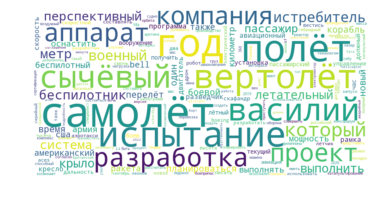


Екатерина Русакова


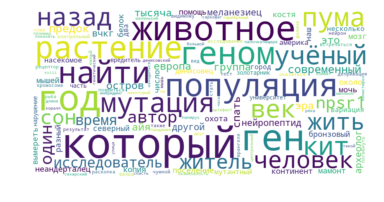


Тимур Кешелава


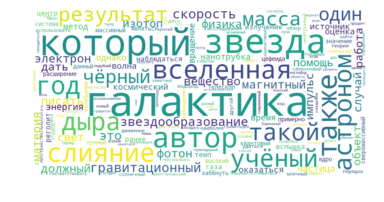


Полина Лосева


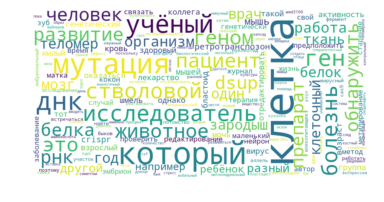


Дмитрий Трунин


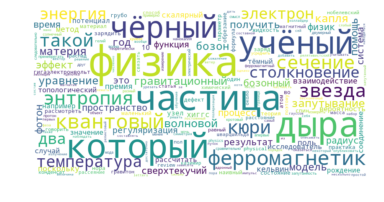


Григорий Копиев


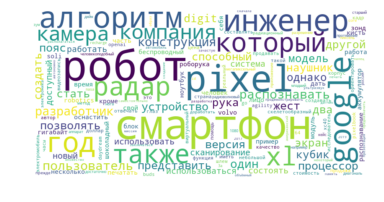


Александр Войтюк


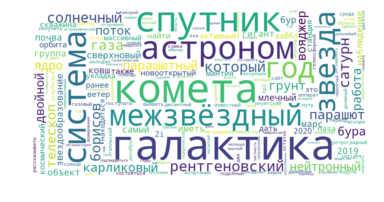


Елизавета Ивтушок


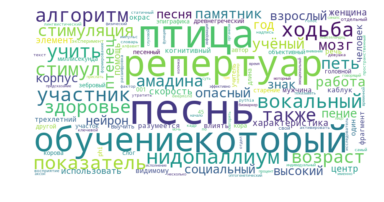

In [58]:
for index, row in df_author.iterrows():
    author = row.author
    document = row.text
    tokenized_document = row.tokenized_text
    print(author)
    X = tfidf_vectorizer.transform([tokenized_document])
    
    tfidf_scores = [(feature_names[col], X[0, col]) for col in X.nonzero()[1]]
    freq_list = [(word, freq) for word, freq in sorted( tfidf_scores, 
                                                        key=itemgetter(1), 
                                                        reverse=True)]

    show_wordcloud_by_freq_dict(dict(freq_list))
    #print(document)
    print("")

    #proceed = input("proceed? ( [n] to refuse) : ")
    #if proceed.strip().lower() == "n":
    #    break

### Получилось облако слов для каждого автора.
Можно надеяться увидеть любимые слова авторов

## Закон Ципфа для разных авторов